In [1]:
!nvidia-smi

Sun Sep  8 10:25:35 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


# **Install YOLOv8**

In [3]:
# Pip install method ()

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

# **Custom Training**

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [7]:
!ls

data.yaml  runs  test  train  valid  yolov8s.pt


In [8]:
%cd /content/drive/MyDrive/data

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True


/content/drive/MyDrive/data
Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

In [9]:
!ls runs/detect/train/

args.yaml					    R_curve.png		train_batch122.jpg
confusion_matrix.png				    results.csv		train_batch1.jpg
events.out.tfevents.1725626839.3a6cc0ec56a0.6135.0  results.png		train_batch2.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					    train_batch120.jpg	val_batch0_pred.jpg
PR_curve.png					    train_batch121.jpg	weights


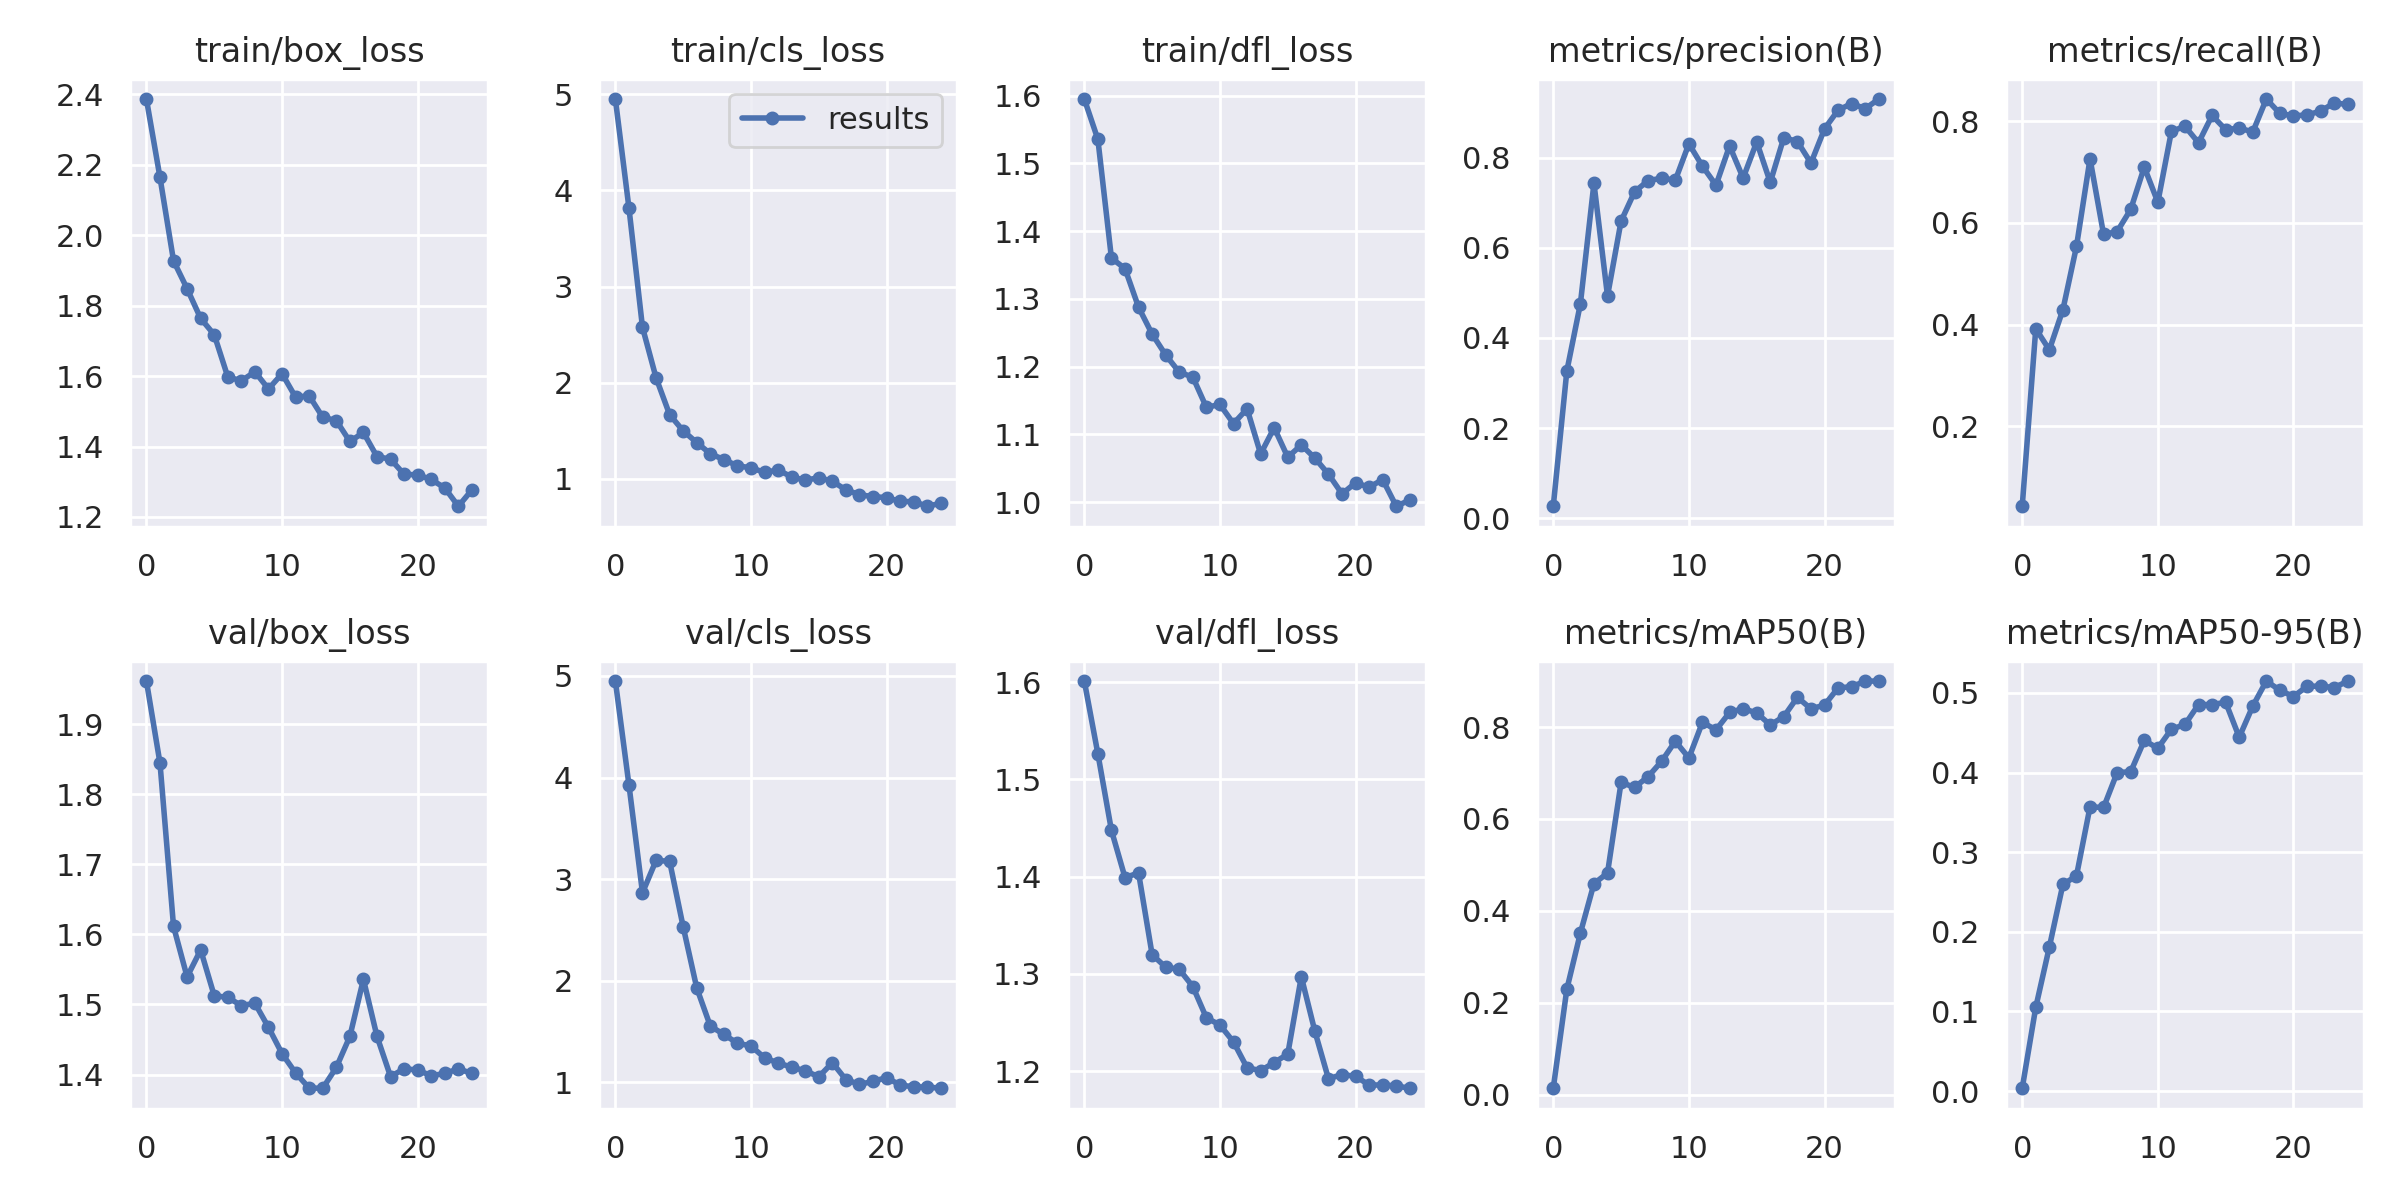

In [10]:
Image(filename="/content/drive/MyDrive/data/runs/detect/train/results.png",width=800)

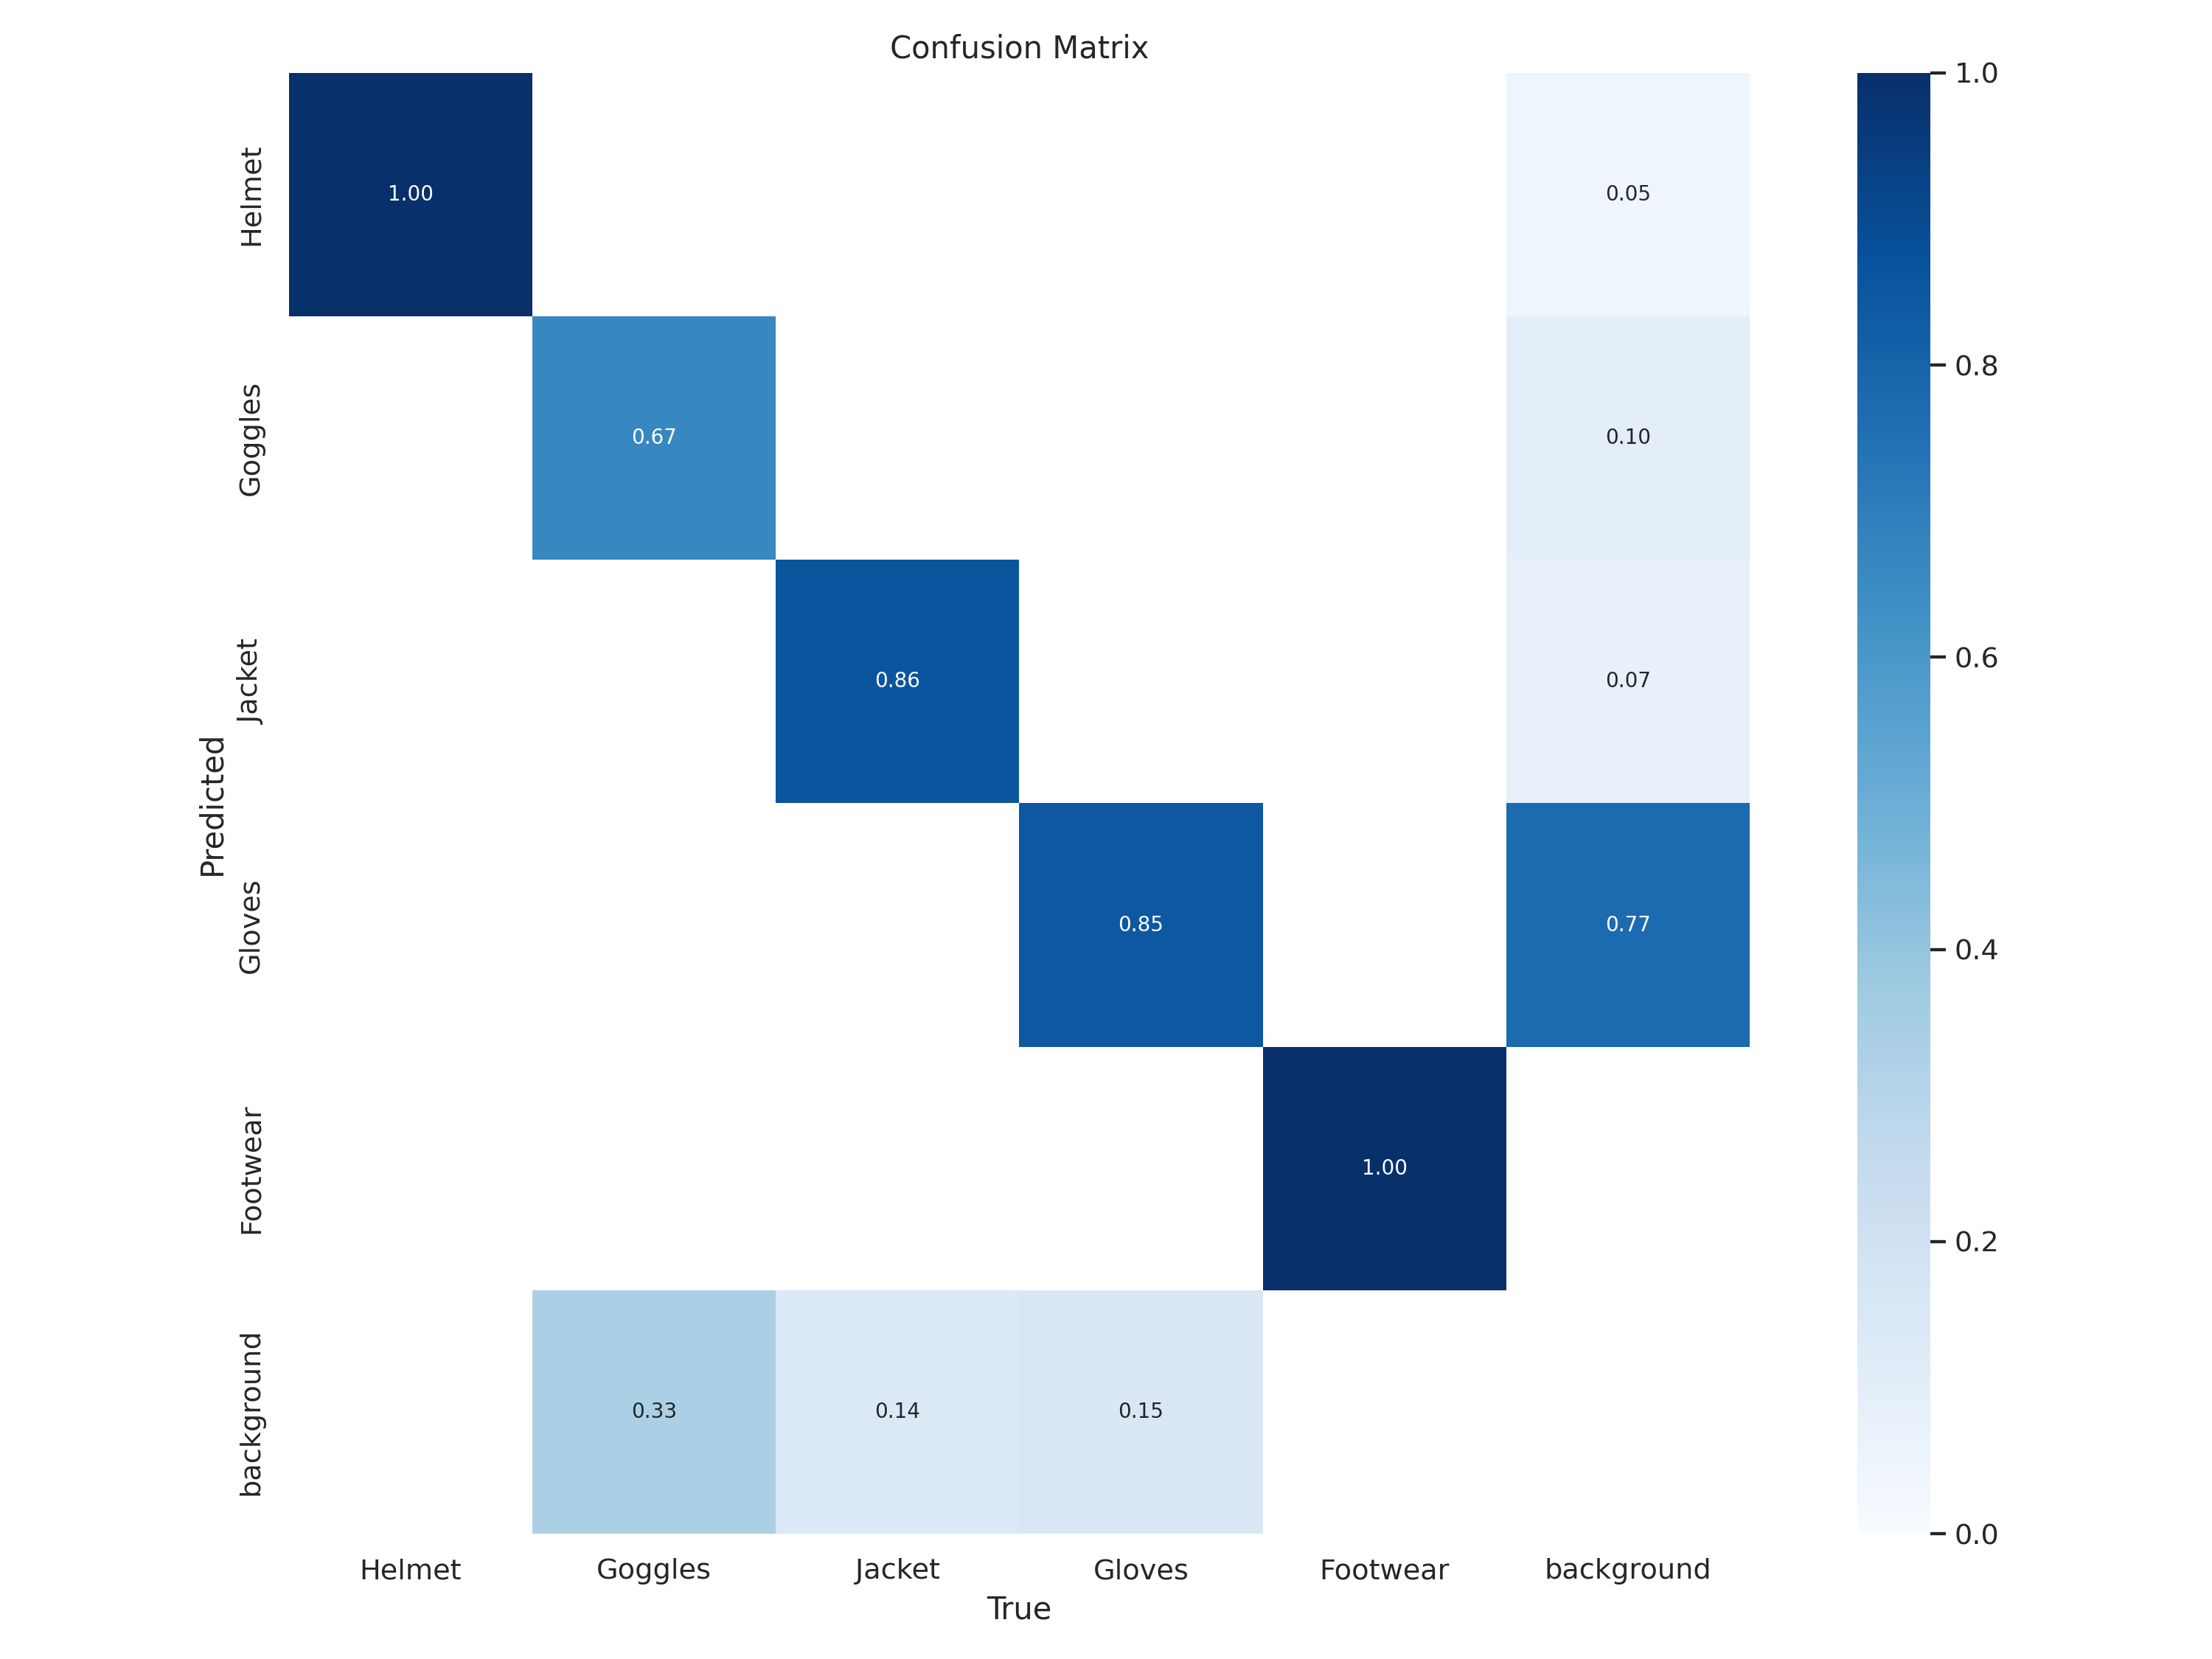

In [11]:
Image(filename="/content/drive/MyDrive/data/runs/detect/train/confusion_matrix.png",width=800)

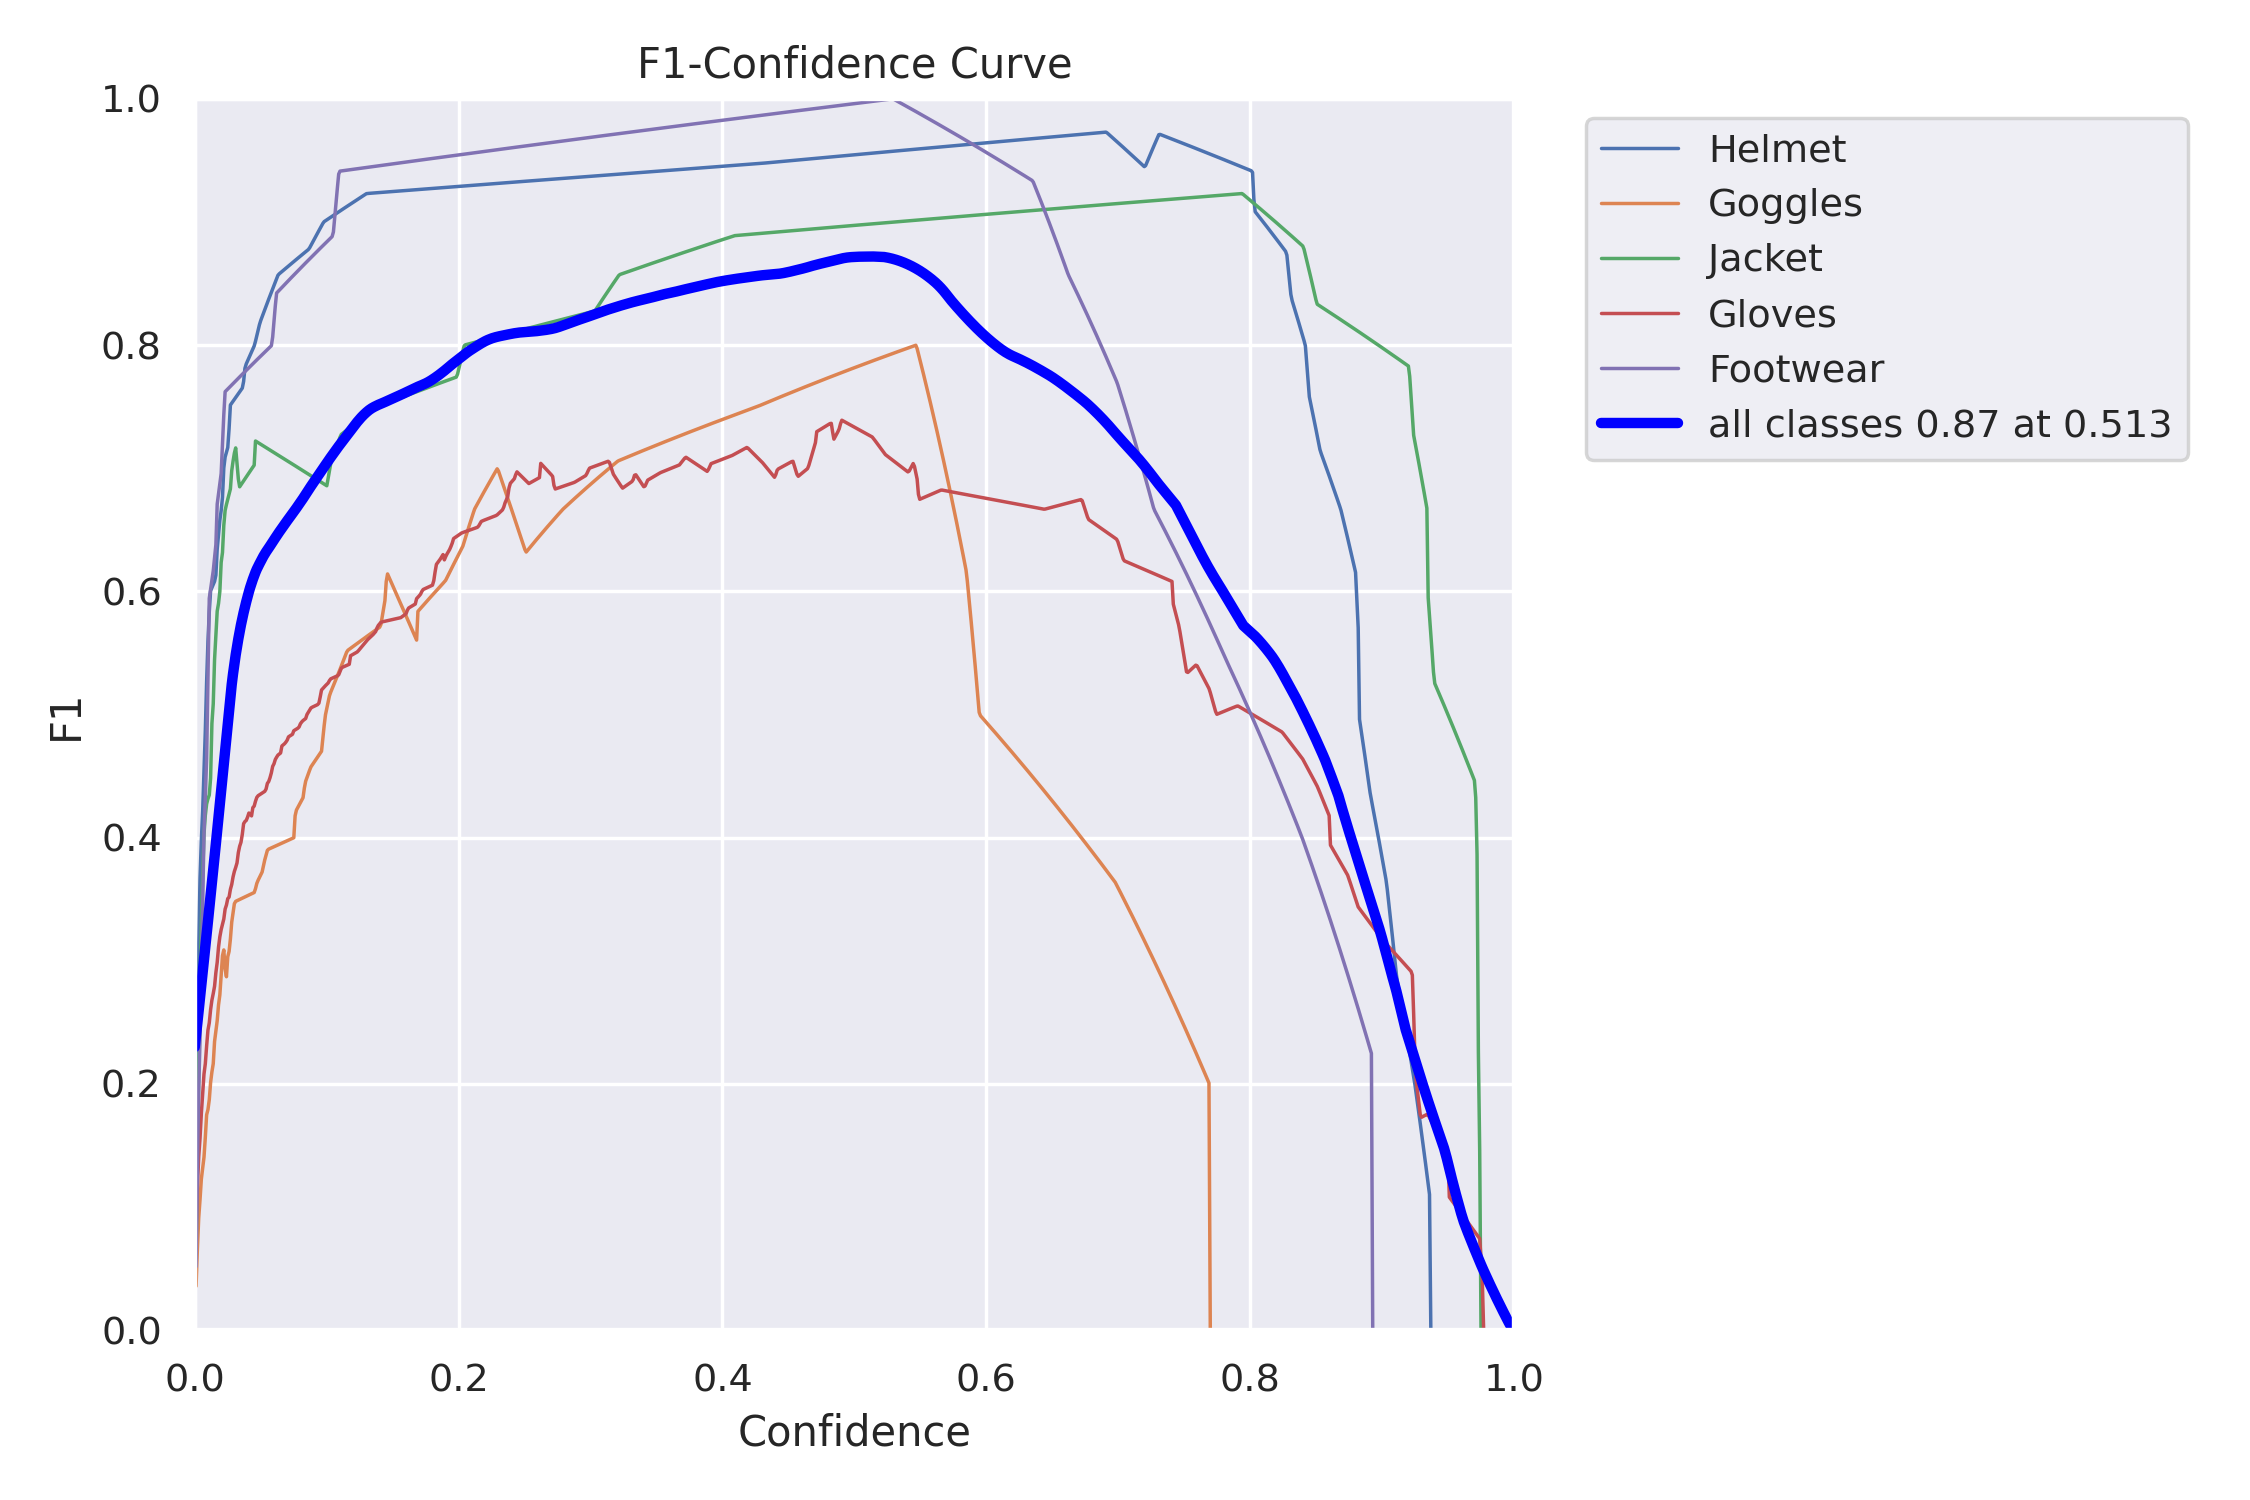

In [12]:
Image(filename="/content/drive/MyDrive/data/runs/detect/train/F1_curve.png",width=800)

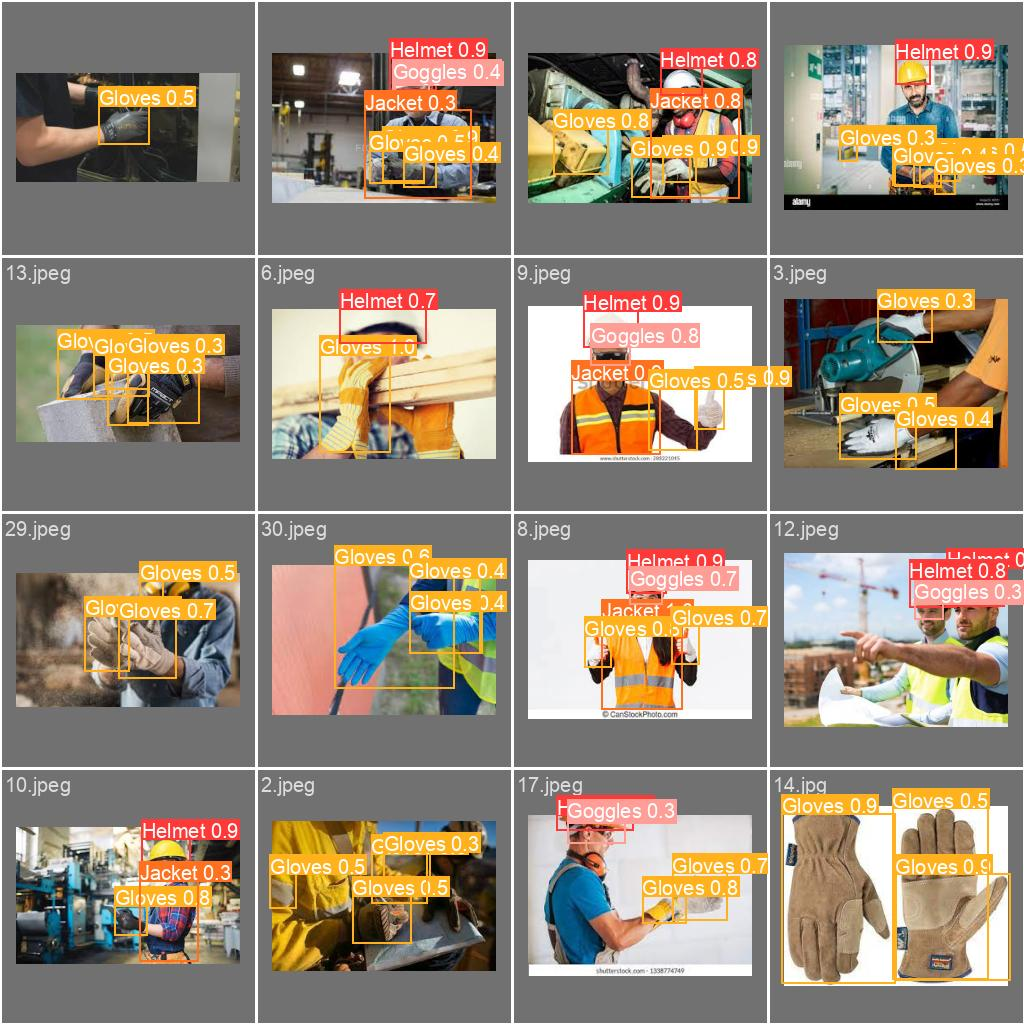

In [13]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

# **Validate Custom Model**

In [14]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.08it/s]
                   all         31        101      0.892      0.826      0.899      0.515
                Helmet         17         18      0.909          1      0.992      0.685
               Goggles          9          9      0.897      0.667      0.801       0.35
                Jacket         13         14      0.896      0.857      0.949      0.652
                Gloves         30         52      0.761      0.612      0.757      0.422
              Footwear          4          8          1      0.996      0.995      0.467
Speed: 1.0ms preprocess, 30.9ms inference, 

# **Inference with Custom Model**

In [15]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/data/test/images

Ultralytics YOLOv8.2.90 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/data/test/images/1.jpeg: 192x224 1 Helmet, 2 Goggless, 3 Glovess, 38.1ms
image 2/31 /content/drive/MyDrive/data/test/images/10.jpeg: 160x224 3 Glovess, 38.8ms
image 3/31 /content/drive/MyDrive/data/test/images/11.jpeg: 224x224 4 Glovess, 8.5ms
image 4/31 /content/drive/MyDrive/data/test/images/12.jpeg: 192x224 4 Glovess, 8.5ms
image 5/31 /content/drive/MyDrive/data/test/images/13.jpeg: 128x224 1 Gloves, 45.2ms
image 6/31 /content/drive/MyDrive/data/test/images/14(1).jpeg: 224x224 (no detections), 8.7ms
image 7/31 /content/drive/MyDrive/data/test/images/14.jpg: 192x224 2 Helmets, 1 Goggles, 8.3ms
image 8/31 /content/drive/MyDrive/data/test/images/15.jpeg: 224x224 1 Gloves, 9.5ms
image 9/31 /content/drive/MyDrive/data/test/images/16.jpeg: 224x160 1 Helmet, 1 Goggles, 1 Jacket, 2 Glovess

In [23]:
import os
import cv2
import matplotlib.pyplot as plt

folder  = "/content/drive/MyDrive/data/runs/detect/predict"

plt.figure(figsize=(10,12))
for i in os.listdir(folder) :
  filename = os.path.join(folder,i)

  # Read the image in BGR format
  img = cv2.imread(filename, cv2.IMREAD_COLOR)

  # Convert the image from BGR to RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Display the image using matplotlib
  plt.title("Detected Objects in test image")
  plt.imshow(img_rgb)
  plt.axis('off')  # Optional: hide the axes
  print("**************************************************")
  plt.show()

Output hidden; open in https://colab.research.google.com to view.